In [1]:
from featurizer import Featurizer
import pandas as pd

In [2]:
featurizer = Featurizer('synthetic_outputs',
                        cdr_fname='synthetic_data/cdr.csv', 
                        topups_fname='synthetic_data/topups.csv',
                        mobiledata_fname='synthetic_data/mobiledata.csv',
                        mobilemoney_fname='synthetic_data/mobilemoney.csv')

Loading CDR...
Loading topups...
Loading mobile data...
Loading mobile money...


Outliers removed: 2020-02-21, 2020-02-28


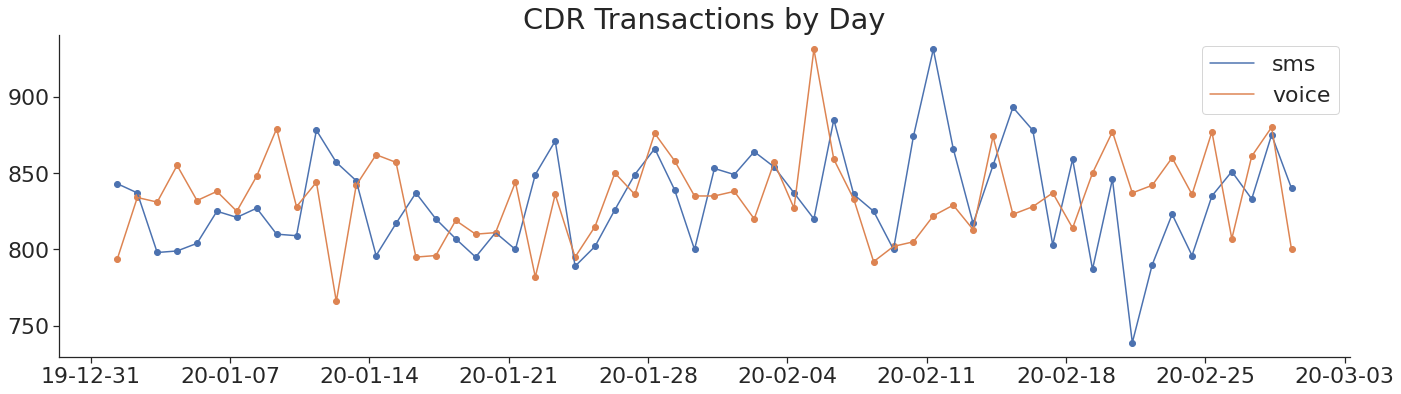

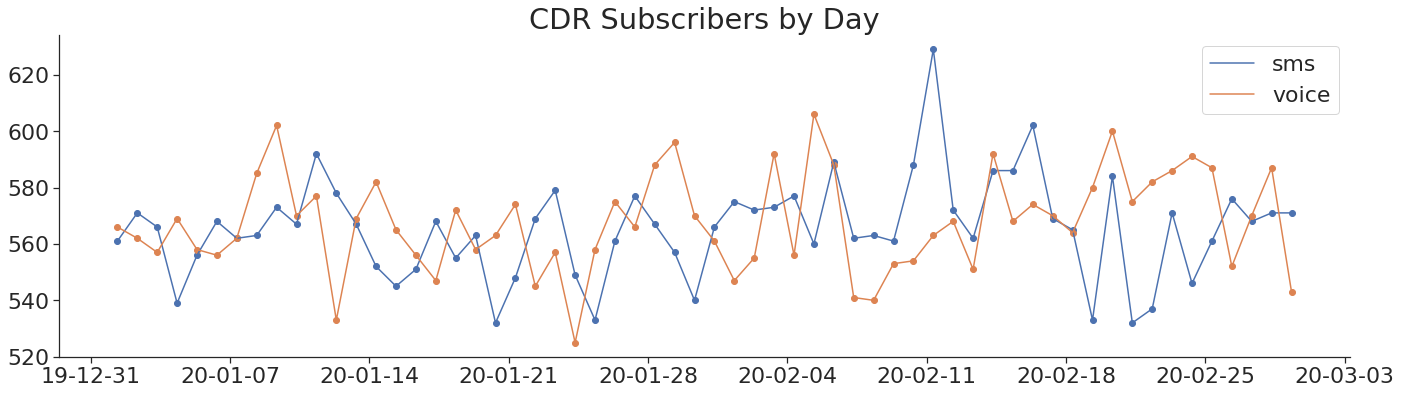

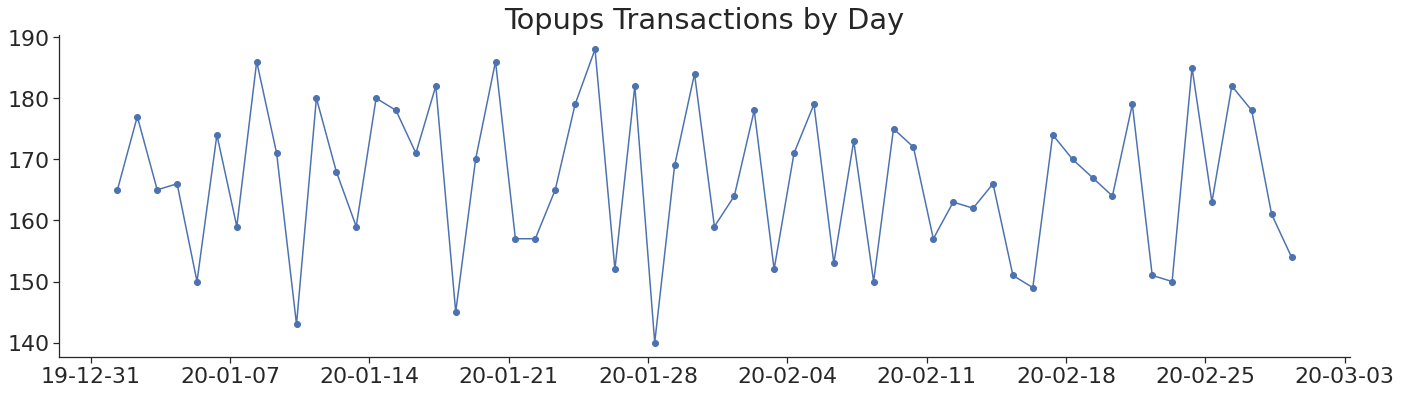

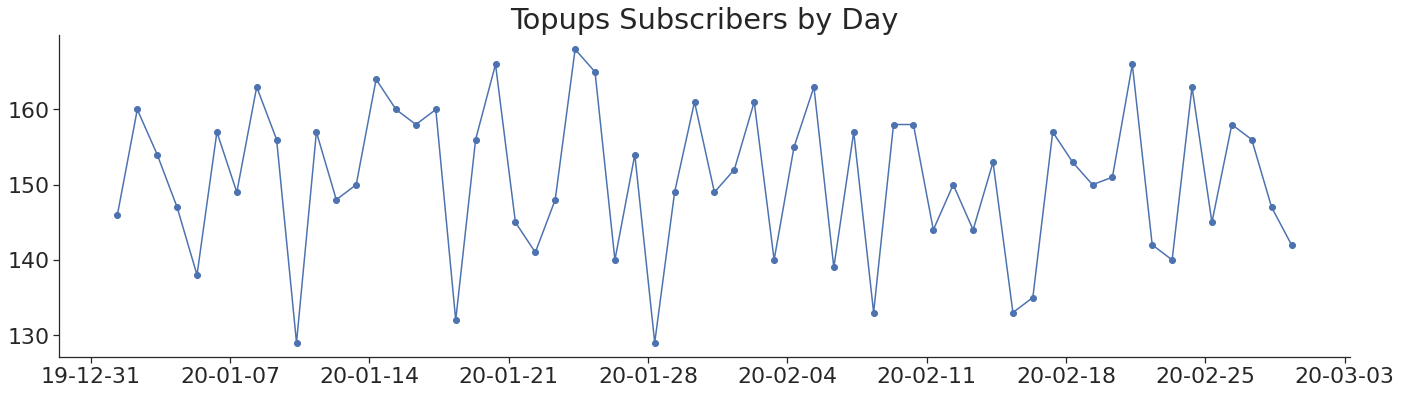

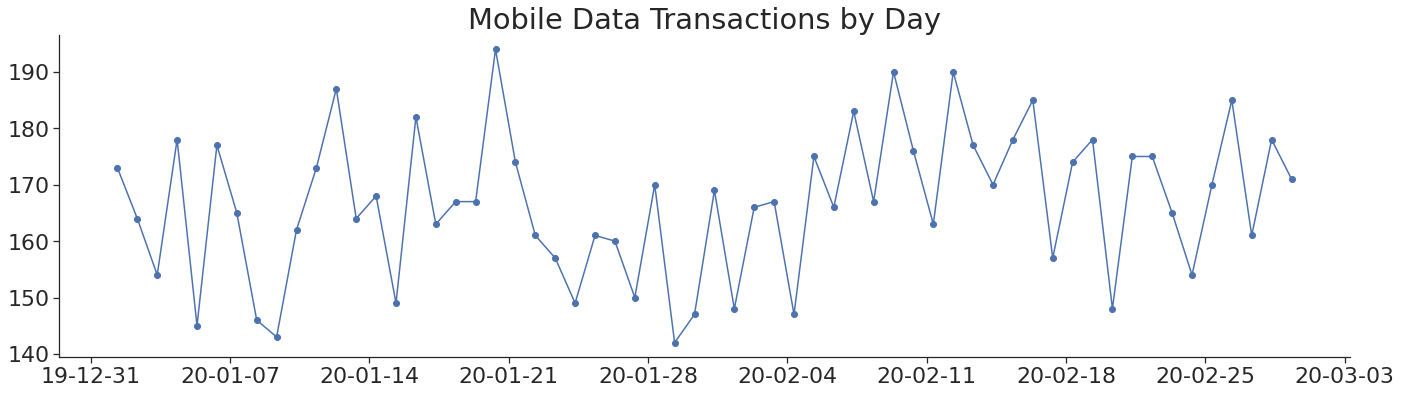

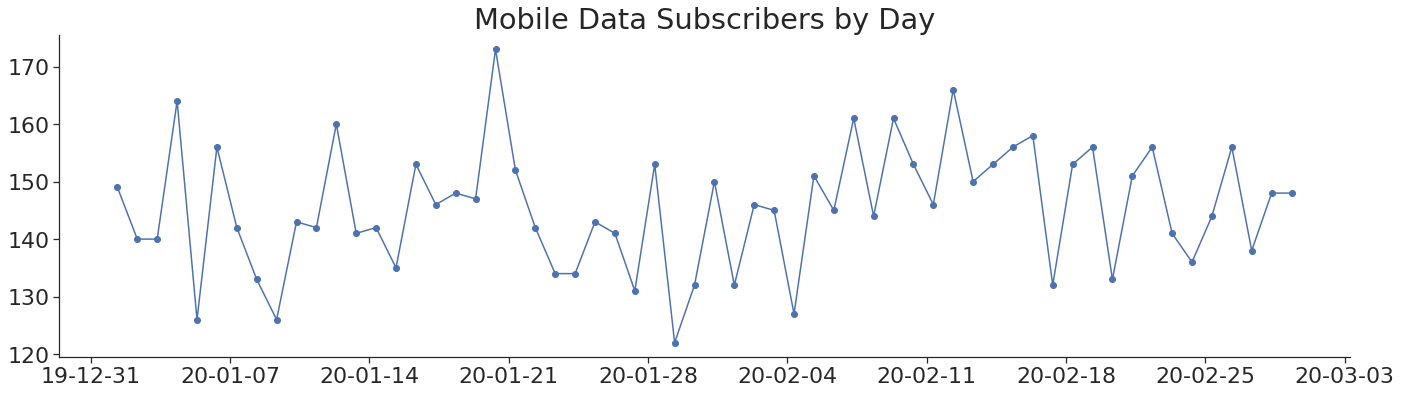

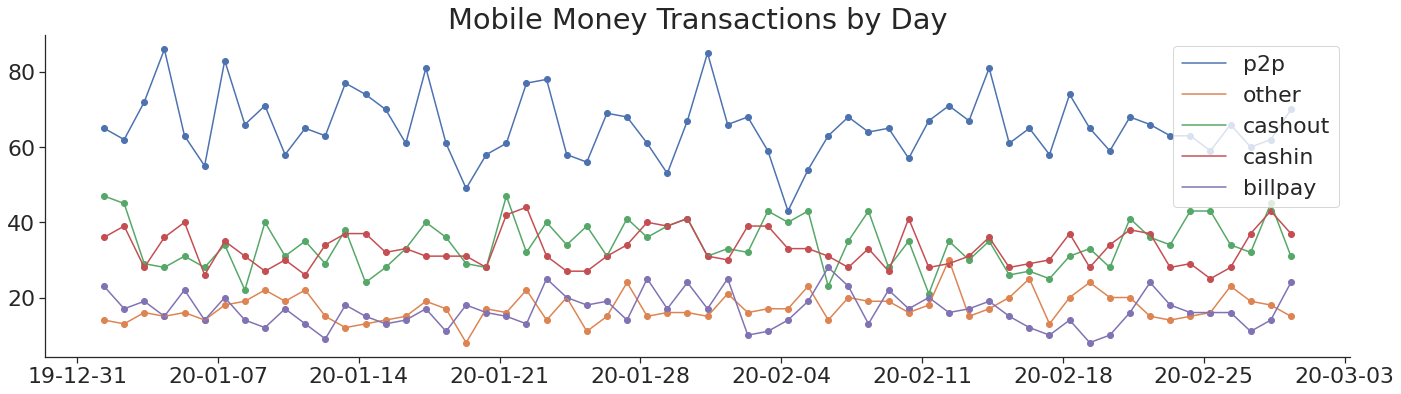

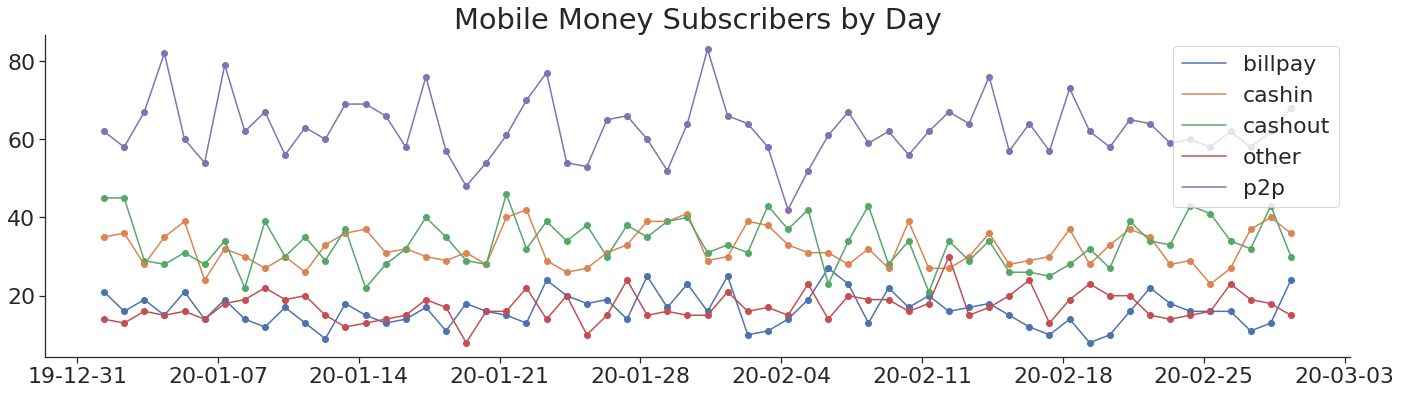

In [3]:
featurizer.diagnostic_plots('test_output')
featurizer.filter_outlier_days(num_sds=2)

In [4]:
featurizer.filter_dates(start_date='2020-01-01', end_date='2020-02-01')

In [7]:
print(json.dumps(featurizer.diagnostic_statistics(), sort_keys=False, indent=4))

{
    "CDR": {
        "Days": 32,
        "Transactions": 52995,
        "Subscribers": 1000,
        "Recipients": 1000
    },
    "Topups": {
        "Days": 32,
        "Transactions": 5371,
        "Subscribers": 799
    },
    "Mobile Data": {
        "Days": 32,
        "Transactions": 5209,
        "Subscribers": 600
    },
    "Mobile Money": {
        "Days": 32,
        "Transactions": 5375,
        "Subscribers": 700,
        "Recipients": 692
    }
}


In [10]:
featurizer.remove_spammers(spammer_threshold=1)

Number of spammers identified: 115


In [11]:
print(json.dumps(featurizer.diagnostic_statistics(), sort_keys=True, indent=4))

{
    "CDR": {
        "Days": 60,
        "Recipients": 885,
        "Subscribers": 885,
        "Transactions": 77092
    },
    "Mobile Data": {
        "Days": 60,
        "Subscribers": 536,
        "Transactions": 8938
    },
    "Mobile Money": {
        "Days": 60,
        "Recipients": 622,
        "Subscribers": 622,
        "Transactions": 4747
    },
    "Topups": {
        "Days": 60,
        "Subscribers": 707,
        "Transactions": 8848
    }
}


In [13]:
featurizer.mobiledata.tail(5)

[Row(subscriber_id='oSbAqwiOsw', volume=126.1409683227539, timestamp=datetime.datetime(2020, 2, 29, 23, 45, 26)),
 Row(subscriber_id='gvsutalzBt', volume=97.0714340209961, timestamp=datetime.datetime(2020, 2, 29, 23, 50, 51)),
 Row(subscriber_id='SFVkVBNAYV', volume=117.57475280761719, timestamp=datetime.datetime(2020, 2, 29, 23, 50, 59)),
 Row(subscriber_id='fIEKotAegd', volume=81.44477844238281, timestamp=datetime.datetime(2020, 2, 29, 23, 51, 16)),
 Row(subscriber_id='tFPWYsBmKO', volume=54.988739013671875, timestamp=datetime.datetime(2020, 2, 29, 23, 55, 48))]